In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('profiles.csv')

In [4]:
data.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [5]:
len(data)

59946

In [6]:
data.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
sorted(data.isnull().sum()/len(data))

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 5.0045040536482834e-05,
 0.0008340840089413805,
 0.04979481533380042,
 0.08834617822707103,
 0.09154906082140593,
 0.09194942114569779,
 0.09475194341574084,
 0.1105661762252694,
 0.1263136823140827,
 0.13675641410602876,
 0.1607780335635405,
 0.17577486404430653,
 0.18099622994027958,
 0.18443265605711806,
 0.19143896173222566,
 0.2077035999065826,
 0.21023921529376438,
 0.22972341774263505,
 0.23487805691789276,
 0.32070530143796083,
 0.3323157508424249,
 0.33740366329696725,
 0.4069495879624996,
 0.5932172288392887]

In [8]:
data.drinks.nunique()

6

In [9]:
data.drinks.value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [10]:
copy_data = data.iloc[:,0:]

In [11]:
total_count = copy_data.isnull().count()
count_na = copy_data.isnull().sum().sort_values(ascending = False)
pct_na =(copy_data.isnull().sum()/total_count).sort_values(ascending = False)

pd.options.display.float_format = '{:.1%}'.format

missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])

# Only show columns with more than 5% missing data
missing_data[missing_data['Percent']>=0.05].head(21)

,Count,Percent
offspring,35561,59.3%
diet,24395,40.7%
religion,20226,33.7%
pets,19921,33.2%
essay8,19225,32.1%
drugs,14080,23.5%
essay6,13771,23.0%
essay9,12603,21.0%
essay7,12451,20.8%
essay3,11476,19.1%


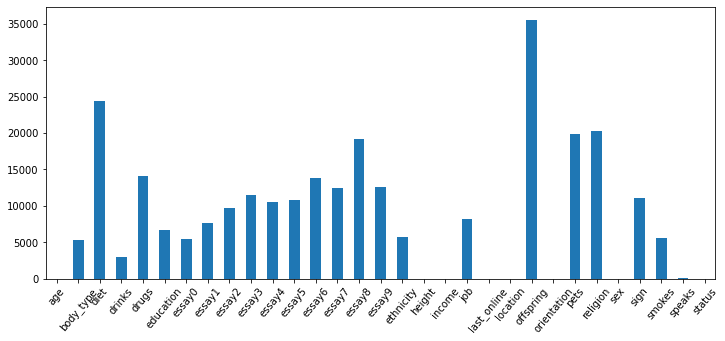

In [12]:
plt.figure(figsize=(12, 5))
copy_data.isnull().sum().plot(kind='bar')
plt.xticks(rotation=50)
plt.show()

In [13]:
data.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

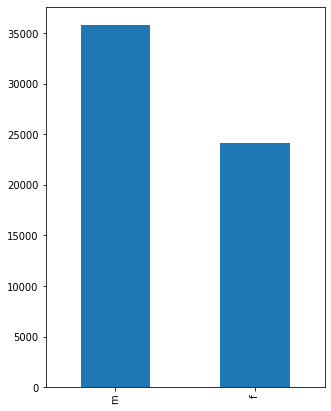

In [14]:
plt.figure(figsize=(5,7))
data.sex.value_counts().plot(kind='bar')
plt.show()

In [15]:
min(data.age)

18

In [17]:
data['18-25']=data['age'].apply(lambda x: 'Yes' if x <= 25 else 'No')

In [19]:
data['26-35']=data['age'].apply(lambda x: 'Yes' if x <= 35 and x > 25 else 'No')

In [21]:
data['35-45']=data['age'].apply(lambda x: 'Yes' if x <= 45 and x > 35 else 'No')

In [22]:
data['45-above']=data['age'].apply(lambda x: 'Yes' if x > 45 else 'No')

In [24]:
data['18-25'].value_counts()

No     45492
Yes    14454
Name: 18-25, dtype: int64

In [25]:
data['26-35'].value_counts()

No     31325
Yes    28621
Name: 26-35, dtype: int64

In [27]:
data['35-45'].value_counts()

No     49143
Yes    10803
Name: 35-45, dtype: int64

In [28]:
data['45-above'].value_counts()

No     53878
Yes     6068
Name: 45-above, dtype: int64

In [33]:
age1 = [x for x in data['18-25'] if x == 'Yes']

In [34]:
age2 = [x for x in data['26-35'] if x == 'Yes']

In [35]:
age3 = [x for x in data['35-45'] if x == 'Yes']

In [36]:
age4 = [x for x in data['45-above'] if x == 'Yes']

In [41]:
data = {'18-25':len(age1), '26-25':len(age2), '35-45':len(age3),  
        '45-above':len(age4)} 
ageType = list(data.keys()) 
count = list(data.values())

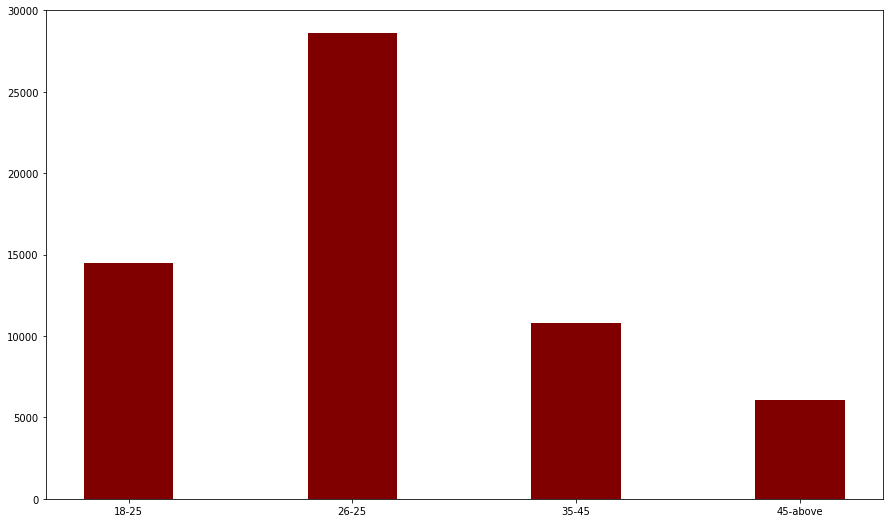

In [50]:
plt.figure(figsize=(15,9))
plt.bar(ageType, count, color ='maroon', width = 0.4)
plt.show()